#### vestaでPOSCARを可視化

In [5]:
import subprocess
VESTA = '/home/morii-k/vesta/VESTA-gtk3/VESTA'
POSCAR = './POSCAR'
myprocess = subprocess.Popen([VESTA, '-open', POSCAR])


(VESTA-gui:193590): Gtk-WARNING **: 01:14:38.014: Negative content width -2 (allocation 32, extents 17x17) while allocating gadget (node button, owner GtkButton)

(VESTA-gui:193590): Gtk-WARNING **: 01:14:38.015: Negative content width -2 (allocation 32, extents 17x17) while allocating gadget (node button, owner GtkButton)

(VESTA-gui:193590): Gtk-WARNING **: 01:14:38.015: Negative content width -2 (allocation 32, extents 17x17) while allocating gadget (node button, owner GtkButton)

(VESTA-gui:193590): Gtk-WARNING **: 01:14:38.015: Negative content width -2 (allocation 32, extents 17x17) while allocating gadget (node button, owner GtkButton)

(VESTA-gui:193590): Gtk-CRITICAL **: 01:14:38.020: gtk_box_gadget_distribute: assertion 'size >= 0' failed in GtkNotebook

(VESTA-gui:193590): Gtk-WARNING **: 01:14:38.285: Negative content width -2 (allocation 32, extents 17x17) while allocating gadget (node button, owner GtkButton)

(VESTA-gui:193590): Gtk-WARNING **: 01:14:38.287: Negative co

type=0 format=0 nitems=0 atom=271 246
workspace= 0 : -1, x=8, y=31; Screen_W=1504


In [1]:
!python3 --version
!which python3

Python 3.10.12


/bin/python3


#### pymatgenでposcarを読み込む： http://owl.nagaokaut.ac.jp/python/pymatgen/structure/

In [7]:
from pymatgen.core import Structure
filename = 'POSCAR'
struc = Structure.from_file(filename)   
struc

Structure Summary
Lattice
    abc : 5.3126 8.895799999999998 6.428400000000003
 angles : 90.0 90.0 90.0
 volume : 303.80507240107204
      A : 5.3126 0.0 0.0
      B : 0.0 8.895799999999998 0.0
      C : 0.0 0.0 6.428400000000003
    pbc : True True True
PeriodicSite: C (1.3281, 6.7341, 5.9077) [0.2500, 0.7570, 0.9190]
PeriodicSite: C (1.3281, 6.6096, 2.6935) [0.2500, 0.7430, 0.4190]
PeriodicSite: C (3.9844, 2.1617, 0.5207) [0.7500, 0.2430, 0.0810]
PeriodicSite: C (3.9844, 2.2862, 3.7349) [0.7500, 0.2570, 0.5810]
PeriodicSite: Ba (1.3281, 3.7034, 4.8528) [0.2500, 0.4163, 0.7549]
PeriodicSite: Ba (1.3281, 0.7445, 1.6386) [0.2500, 0.0837, 0.2549]
PeriodicSite: Ba (3.9844, 5.1924, 1.5756) [0.7500, 0.5837, 0.2451]
PeriodicSite: Ba (3.9844, 8.1513, 4.7898) [0.7500, 0.9163, 0.7451]
PeriodicSite: O (1.3281, 8.0160, 5.8640) [0.2500, 0.9011, 0.9122]
PeriodicSite: O (1.3281, 5.3277, 2.6498) [0.2500, 0.5989, 0.4122]
PeriodicSite: O (3.9844, 0.8798, 0.5644) [0.7500, 0.0989, 0.0878]
PeriodicSite: O

### cartesian coordinate（直交座標）
### fractional coordinate（分率座標）
#### 直交座標と分率座標の変換式：https://ja.wikipedia.org/wiki/%E5%88%86%E7%8E%87%E5%BA%A7%E6%A8%99
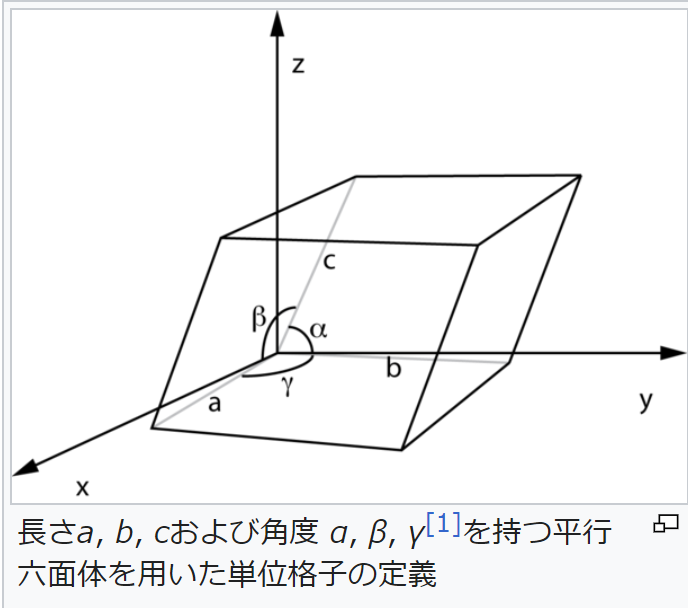
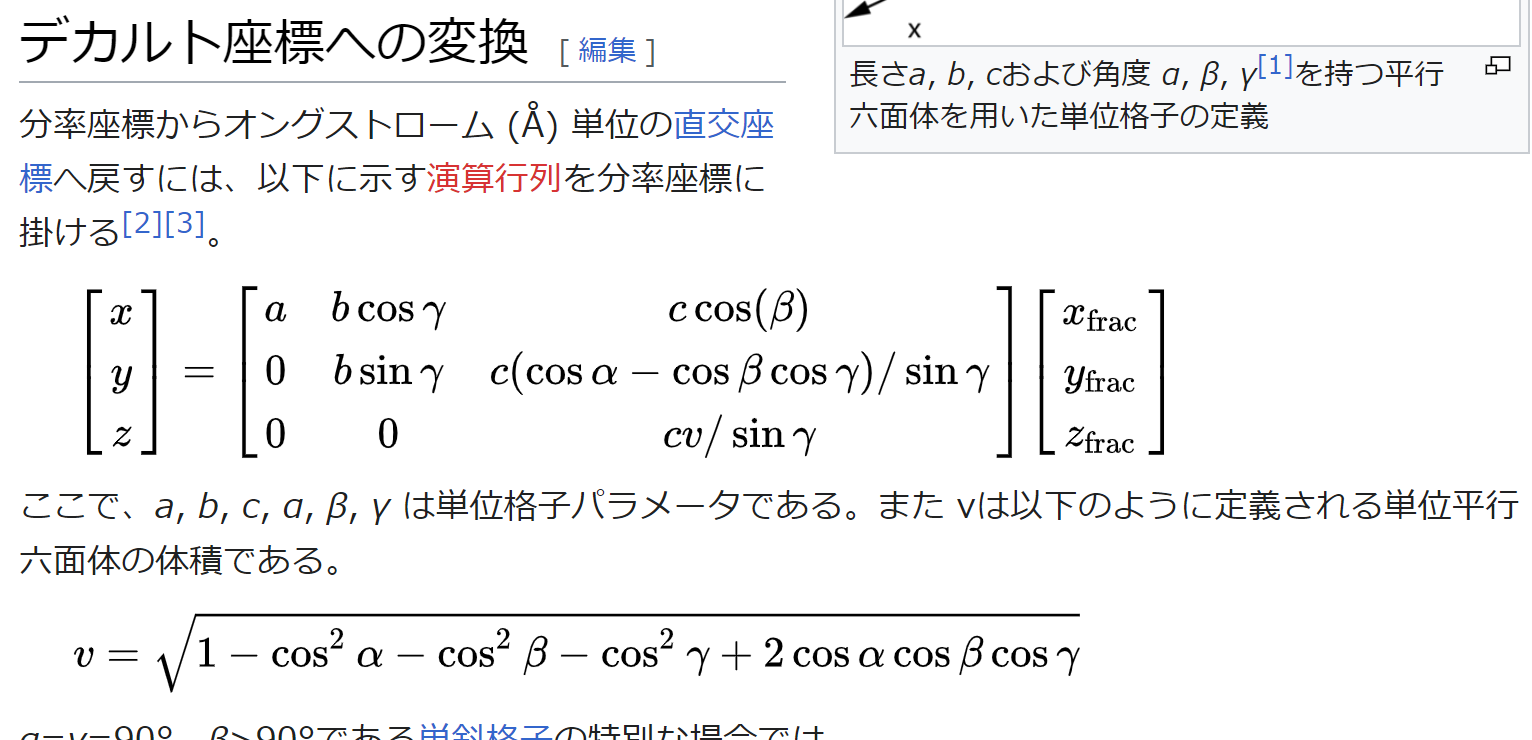

In [8]:
type(struc)

pymatgen.core.structure.Structure

#### pymatgenで隣接原子の情報を取り出す：pymatgen.core.structure module：https://pymatgen.org/pymatgen.core.html

In [9]:
import pandas as pd

In [10]:
method_list = dir(struc)
for method in method_list:
    print(method)


DISTANCE_TOLERANCE
REDIRECT
__abstractmethods__
__class__
__class_getitem__
__contains__
__delattr__
__delitem__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__get_validators__
__getattribute__
__getitem__
__gt__
__hash__
__iadd__
__init__
__init_subclass__
__iter__
__le__
__len__
__lt__
__modify_schema__
__module__
__mul__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__reversed__
__rmul__
__setattr__
__setitem__
__sizeof__
__slots__
__str__
__subclasshook__
__weakref__
_abc_impl
_charge
_get_neighbor_list_py
_lattice
_sites
add_oxidation_state_by_element
add_oxidation_state_by_guess
add_oxidation_state_by_site
add_site_property
add_spin_by_element
add_spin_by_site
append
apply_operation
apply_strain
as_dataframe
as_dict
atomic_numbers
cart_coords
charge
clear
composition
copy
count
density
distance_matrix
extend
extract_cluster
formula
frac_coords
from_dict
from_file
from_magnetic_spacegroup
from_prototype
from_sites
from_spacegroup
from_str
get_all_neighbors
get_all_neighbor

#### あるサイトの原子から一定距離以内の原子座標を取得
##### Structure.get_neighbors(site=, r=)

In [11]:
# struc.get_neighbor_list 

In [12]:
# struc_dict = struc.as_dict()
# struc_site_list = struc_dict['sites']

In [13]:
carbon_site = struc.sites[0]
print(f"site: {carbon_site}")
struc.get_neighbors(site=carbon_site, r=1.3)

site: [1.32815   6.7341206 5.9076996] C


[PeriodicSite: O (0.2152, 6.0838, 5.9206) [0.0405, 0.6839, 0.9210],
 PeriodicSite: O (2.4411, 6.0838, 5.9206) [0.4595, 0.6839, 0.9210],
 PeriodicSite: O (1.3281, 8.0160, 5.8640) [0.2500, 0.9011, 0.9122]]

In [14]:
oxygen_site = struc.sites[10]
print(f"site: {oxygen_site}")
struc.get_neighbors(site=oxygen_site, r=1.3)

site: [3.98445    0.87979462 0.56441352] O


[PeriodicSite: C (3.9844, 2.1617, 0.5207) [0.7500, 0.2430, 0.0810]]

In [15]:
barium_site = struc.sites[4]
print(f"site: {barium_site}")
struc.get_neighbors(site=barium_site, r=2.8)

site: [1.32815    3.7034105  4.85279916] Ba


[PeriodicSite: O (-0.2152, 2.8120, 6.9362) [-0.0405, 0.3161, 1.0790],
 PeriodicSite: O (2.8715, 2.8120, 6.9362) [0.5405, 0.3161, 1.0790],
 PeriodicSite: O (1.3281, 5.3277, 2.6498) [0.2500, 0.5989, 0.4122]]

In [16]:
type(struc.get_neighbors(site=barium_site, r=2.8)[0])

pymatgen.core.structure.PeriodicNeighbor

In [17]:
dir(struc.get_neighbors(site=barium_site, r=2.8)[0])

['REDIRECT',
 '__abstractmethods__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get_validators__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__modify_schema__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_frac_coords',
 '_lattice',
 '_species',
 'a',
 'as_dict',
 'b',
 'c',
 'coords',
 'distance',
 'distance_and_image',
 'distance_and_image_from_frac_coords',
 'distance_from_point',
 'frac_coords',
 'from_dict',
 'image',
 'index',
 'is_ordered',
 'is_periodic_image',
 'lattice',
 'nn_distance',
 'position_atol',
 'properties',
 'specie',
 'species',
 'species_string',
 'to_json',
 'to_unit_cell',
 'unsafe_hash',
 'validate_monty',
 'x',
 'y',
 'z']

In [18]:
struc.get_neighbors(site=barium_site, r=2.8)[0].coords

array([-0.2151603 ,  2.81196238,  6.9362436 ])

In [19]:
struc.get_neighbors(site=barium_site, r=2.8)[0].nn_distance

2.7417562188748206

In [20]:
struc.get_neighbors(site=barium_site, r=2.8)[0].species

Comp: O1

#### 近い原子同士をクラスタと見たとき，中心距離を計算:CO3^2-


In [21]:
carbon_site = struc.sites[0]
print(f"site: {carbon_site}")

struc.get_neighbors(site=carbon_site, r=1.3)

site: [1.32815   6.7341206 5.9076996] C


[PeriodicSite: O (0.2152, 6.0838, 5.9206) [0.0405, 0.6839, 0.9210],
 PeriodicSite: O (2.4411, 6.0838, 5.9206) [0.4595, 0.6839, 0.9210],
 PeriodicSite: O (1.3281, 8.0160, 5.8640) [0.2500, 0.9011, 0.9122]]

In [22]:
carbon_site.coords

array([1.32815  , 6.7341206, 5.9076996])

In [23]:
struc.get_neighbors(site=carbon_site, r=1.3)[0].coords

array([0.2151603 , 6.08383762, 5.9205564 ])

In [24]:
PeriodicSite_list = []
for PeriodicSite in struc.get_neighbors(site=carbon_site, r=1.3):
    PeriodicSite_list.append(PeriodicSite.coords)

PeriodicSite_list

[array([0.2151603 , 6.08383762, 5.9205564 ]),
 array([2.4411397 , 6.08383762, 5.9205564 ]),
 array([1.32815   , 8.01600538, 5.86398648])]

In [25]:
carbon_neighbors_site_list = [carbon_site.coords]
for i in PeriodicSite_list:
    carbon_neighbors_site_list.append(i)


df = pd.DataFrame(carbon_neighbors_site_list, columns=['x', 'y', 'z'])
df


,x,y,z
0,1.32815,6.734121,5.907700
1,0.21516,6.083838,5.920556
2,2.44114,6.083838,5.920556
3,1.32815,8.016005,5.863986


In [26]:
struc.get_neighbors(site=carbon_site, r=1.3)

[PeriodicSite: O (0.2152, 6.0838, 5.9206) [0.0405, 0.6839, 0.9210],
 PeriodicSite: O (2.4411, 6.0838, 5.9206) [0.4595, 0.6839, 0.9210],
 PeriodicSite: O (1.3281, 8.0160, 5.8640) [0.2500, 0.9011, 0.9122]]

In [27]:
[carbon_site.coords, struc.get_neighbors(site=carbon_site, r=1.3)]

[array([1.32815  , 6.7341206, 5.9076996]),
 [PeriodicSite: O (0.2152, 6.0838, 5.9206) [0.0405, 0.6839, 0.9210],
  PeriodicSite: O (2.4411, 6.0838, 5.9206) [0.4595, 0.6839, 0.9210],
  PeriodicSite: O (1.3281, 8.0160, 5.8640) [0.2500, 0.9011, 0.9122]]]

### Structureオブジェクトのcartesian coordinateを編集

In [28]:
struc

Structure Summary
Lattice
    abc : 5.3126 8.895799999999998 6.428400000000003
 angles : 90.0 90.0 90.0
 volume : 303.80507240107204
      A : 5.3126 0.0 0.0
      B : 0.0 8.895799999999998 0.0
      C : 0.0 0.0 6.428400000000003
    pbc : True True True
PeriodicSite: C (1.3281, 6.7341, 5.9077) [0.2500, 0.7570, 0.9190]
PeriodicSite: C (1.3281, 6.6096, 2.6935) [0.2500, 0.7430, 0.4190]
PeriodicSite: C (3.9844, 2.1617, 0.5207) [0.7500, 0.2430, 0.0810]
PeriodicSite: C (3.9844, 2.2862, 3.7349) [0.7500, 0.2570, 0.5810]
PeriodicSite: Ba (1.3281, 3.7034, 4.8528) [0.2500, 0.4163, 0.7549]
PeriodicSite: Ba (1.3281, 0.7445, 1.6386) [0.2500, 0.0837, 0.2549]
PeriodicSite: Ba (3.9844, 5.1924, 1.5756) [0.7500, 0.5837, 0.2451]
PeriodicSite: Ba (3.9844, 8.1513, 4.7898) [0.7500, 0.9163, 0.7451]
PeriodicSite: O (1.3281, 8.0160, 5.8640) [0.2500, 0.9011, 0.9122]
PeriodicSite: O (1.3281, 5.3277, 2.6498) [0.2500, 0.5989, 0.4122]
PeriodicSite: O (3.9844, 0.8798, 0.5644) [0.7500, 0.0989, 0.0878]
PeriodicSite: O

## Structureオブジェクトを作る３つの引数：ex.) 
new_struc = Structure(lattice=, species=, coords=)

##### ※ strucはStructureオブジェクトのインスタンス
##### struc.lattice  # 格子（.lattice）：type --> <class 'pymatgen.core.lattice.Lattice'>
##### struc.species  # 元素種（.species）：type --> <class 'list'>
##### struc.cart_coords  # 直交座標（.cart_coords）:type --> <class 'numpy.ndarray'>
##### struc.frac_coords  # 分率座標（.frac_coords）:type --> <class 'numpy.ndarray'>

### Structureインスタンスから，latticeの情報を取得

In [57]:
lattice = struc.lattice
print(type(struc.lattice))

<class 'pymatgen.core.lattice.Lattice'>


### Structureインスタンスから，speciesの情報を取得

In [58]:
species = struc.species
print(type(species))
print(species)

<class 'list'>
[Element C, Element C, Element C, Element C, Element Ba, Element Ba, Element Ba, Element Ba, Element O, Element O, Element O, Element O, Element O, Element O, Element O, Element O, Element O, Element O, Element O, Element O]


In [59]:
type(species[0])

<enum 'Element'>

In [60]:
str(species[10])

'O'

In [61]:
species = [str(s) for s in species]
species

['C',
 'C',
 'C',
 'C',
 'Ba',
 'Ba',
 'Ba',
 'Ba',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O']

### Structureインスタンスから，cart_coords(直交座標)の情報を取得

In [62]:
cart_coords = struc.cart_coords
print(type(cart_coords))

<class 'numpy.ndarray'>


### 3つの引数からStructureインスタンスを生成する
#### new_struc = Structure(lattice=, species=, coords=)

In [63]:
new_struc = Structure(lattice=lattice, species=species, coords=cart_coords)

### structureインスタンスをPOSCARとして出力

In [69]:
new_struc.to(fmt="POSCAR", filename="./gen_data/new.POSCAR")

##### 出力したPOSCARをVESTAで可視可視化

In [70]:
import subprocess
VESTA = '/home/morii-k/vesta/VESTA-gtk3/VESTA'
POSCAR = './gen_data/new.POSCAR'
myprocess = subprocess.Popen([VESTA, '-open', POSCAR])


(VESTA-gui:193932): Gtk-WARNING **: 01:56:08.832: Negative content width -2 (allocation 32, extents 17x17) while allocating gadget (node button, owner GtkButton)

(VESTA-gui:193932): Gtk-WARNING **: 01:56:08.832: Negative content width -2 (allocation 32, extents 17x17) while allocating gadget (node button, owner GtkButton)

(VESTA-gui:193932): Gtk-WARNING **: 01:56:08.832: Negative content width -2 (allocation 32, extents 17x17) while allocating gadget (node button, owner GtkButton)

(VESTA-gui:193932): Gtk-WARNING **: 01:56:08.832: Negative content width -2 (allocation 32, extents 17x17) while allocating gadget (node button, owner GtkButton)

(VESTA-gui:193932): Gtk-CRITICAL **: 01:56:08.835: gtk_box_gadget_distribute: assertion 'size >= 0' failed in GtkNotebook

(VESTA-gui:193932): Gtk-WARNING **: 01:56:09.009: Negative content width -2 (allocation 32, extents 17x17) while allocating gadget (node button, owner GtkButton)

(VESTA-gui:193932): Gtk-WARNING **: 01:56:09.009: Negative co

type=0 format=0 nitems=0 atom=271 246
workspace= 0 : -1, x=8, y=31; Screen_W=1504


In [66]:
from pymatgen.io.vasp import Poscar

In [67]:
dir(Poscar)

['REDIRECT',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get_validators__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__modify_schema__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'as_dict',
 'from_dict',
 'from_file',
 'from_string',
 'get_string',
 'natoms',
 'predictor_corrector',
 'selective_dynamics',
 'set_temperature',
 'site_symbols',
 'to_json',
 'unsafe_hash',
 'validate_monty',
 'velocities',
 'write_file']

In [ ]:
Poscar.write_file()

In [4]:
# from pymatgen.core import Structure


# # POSCARファイルからStructureインスタンスを生成
# filename = 'POSCAR'
# structure = Structure.from_file(filename)   


# # Structureをラティス、元素種、直交座標に分解
# lattice = structure.lattice
# species = structure.species
# cart_coords = structure.cart_coords

# # 新しいPOSCARファイルを作成
# new_poscar_content = f"Generated by pymatgen\n1.0\n"
# new_poscar_content += "\n".join([f"{lattice.a} 0.0 0.0", f"0.0 {lattice.b} 0.0", f"0.0 0.0 {lattice.c}"]) + "\n"
# new_poscar_content += " ".join([str(e) for e in species]) + "\n"
# new_poscar_content += " ".join([str(e) for e in structure.species]) + "\n"
# new_poscar_content += "Direct\n"
# new_poscar_content += "\n".join([f"{coord[0]:.9f} {coord[1]:.9f} {coord[2]:.9f}" for coord in structure.frac_coords]) + "\n"

# # # 新しいPOSCARファイルを保存
# with open("new.poscar", "w") as f:
#     f.write(new_poscar_content)


In [6]:
# import subprocess
# VESTA = '/home/morii-k/vesta/VESTA-gtk3/VESTA'
# # POSCAR = './gen_data/new.POSCAR'
# POSCAR = 'new.poscar'
# myprocess = subprocess.Popen([VESTA, '-open', POSCAR])

In [8]:
from pymatgen.core import Structure, Lattice, Element
import numpy as np

# # POSCARファイルからStructureインスタンスを生成
filename = 'POSCAR'
structure = Structure.from_file(filename)   


# 高精度のPOSCARファイルに書き出すための精度を指定
decimal_places = 10

# 新しいPOSCARファイルを作成
new_poscar_content = f"Generated by pymatgen\n1.0\n"
new_poscar_content += "\n".join([f"{structure.lattice.a:.{decimal_places}f} 0.0 0.0",
                                f"0.0 {structure.lattice.b:.{decimal_places}f} 0.0",
                                f"0.0 0.0 {structure.lattice.c:.{decimal_places}f}"]) + "\n"
new_poscar_content += " ".join([str(e) for e in structure.species]) + "\n"
new_poscar_content += " ".join([str(e) for e in structure.species]) + "\n"
new_poscar_content += "Direct\n"
new_poscar_content += "\n".join([f"{coord[0]:.{decimal_places}f} {coord[1]:.{decimal_places}f} {coord[2]:.{decimal_places}f}" for coord in structure.frac_coords]) + "\n"

# 新しい高精度のPOSCARファイルを保存
with open("new_high_precision.poscar", "w") as f:
    f.write(new_poscar_content)


In [10]:
# import subprocess
# VESTA = '/home/morii-k/vesta/VESTA-gtk3/VESTA'
# # POSCAR = './gen_data/new.POSCAR'
# POSCAR = 'new_high_precision.poscar'
# myprocess = subprocess.Popen([VESTA, '-open', POSCAR])

#### 生成したStructureインスタンスを描画

In [16]:
from ase.visualize import view, ngl
from pymatgen.io import ase

In [17]:
ase_adpter = ase.AseAtomsAdaptor()
struc_ase = ase_adpter.get_atoms(new_struc)

NameError: name 'new_struc' is not defined

In [18]:
ngl.view_ngl(struc_ase)

NameError: name 'struc_ase' is not defined

#### pymatgenのStructureオブジェクトをnotebook上で可視化する２：https://stackoverflow.com/questions/27664407/plot-materials-structure-pymatgen

In [28]:
import nglview as nv

view = nv.show_pymatgen(struc)
view.add_unitcell()
view

NGLWidget()

#### pymatgenのStructureオブジェクトをnotebook上で可視化する：https://twitter.com/resnant/status/1193830807128788993/photo/1

In [35]:
from ase.visualize import view, ngl
from pymatgen.io import ase

In [36]:
ase_adpter = ase.AseAtomsAdaptor()
struc_ase = ase_adpter.get_atoms(struc)

In [19]:
ngl.view_ngl(struc_ase)

NameError: name 'struc_ase' is not defined

#### nglview · PyPI:https://pypi.org/project/nglview/

In [47]:
!pip install nglview

5438.98s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 7.5 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for ipywidgets>=7 from https://files.pythonhosted.org/packages/4a/0e/57ed498fafbc60419a9332d872e929879ceba2d73cb11d284d7112472b3e/ipywidgets-8.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for jupyterlab-widgets from https://files.pythonhosted.org/packages/e8/05/0ebab152288693b5ec7b339aab857362947031143b282853b4c2dd4b5b40/jupyterlab_widgets-3.0.9-py3-none-any.whl.metadata
  Obtaining dependency information for widgetsnbextension~=4.0.9 from https://files.pythonhosted.org/packages/29/03/107d96077c4befed191f7ad1a12c7b52a8f9d2778a5836d59f9855c105f6/widgetsnbextension-4.0.9-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
ngl.view_ngl(struc_ase)

In [ ]:
# type(struc)